## DS 3000 Project Phase 2


###  IMPACT OF MACRO ECONOMIC FACTORS ON NETFLIX'S FINANCIAL PERFORMANCE AND STOCK PRICE

By : Darsheen Chona, Chen Yu Hsia, Hayli Wynn and Ethan Pon

### Central Motivation: 

The primary objective of this project is to analyze how macroeconomic factors influence Netflix's financial performance and stock price. By examining key economic indicators such as GDP, unemployment rate, inflation (measured by CPI), retail sales, and industrial production, we aim to identify patterns and correlations that could explain variations in Netflix’s profitability and stock movements. Ultimately, this analysis can lead to predictive models that help investors understand the impact of broader economic changes on Netflix's business performance.

#### Key Questions:

1. How do macro economic factors like GDP, Unemployment rate, CPI, retail sales and industrial output correlate with the financial performance of Netflix?
2. How do the macro economic factors like inflation affect the stock price of Netflix?


We are examining how macroeconomic factors like GDP, unemployment rate, CPI, retail sales, and industrial output correlate with Netflix’s financial performance to understand whether economic conditions influence subscription growth and profitability. By analyzing these factors, we can assess if Netflix thrives during economic expansion or faces challenges during downturns, helping investors gauge its resilience across different economic cycles. Additionally, understanding how inflation (CPI) affects Netflix’s stock price can reveal the impact of rising costs on profitability and whether Netflix can sustain its value under varying economic pressures. These insights are valuable for predicting how external economic trends might influence Netflix’s future performance and stock stability

### Data Processing :



Macroeconomic Data Retrieval and Cleaning:

We collect macroeconomic data from the Federal Reserve Economic Data (FRED) API using a set of specific series IDs (e.g., GDP, UNRATE, CPIAUCSL, RSAFS, INDPRO).
Each series is retrieved using API requests, converted to a pandas DataFrame, and cleaned to ensure the data types are consistent (dates converted to datetime format and values to numerical types).
We then merge these series into a single DataFrame, aligning data points by date.
The merged DataFrame undergoes further processing to add categorical features, such as the classification of inflation levels (low, medium, high) and GDP growth stages (recession, stagnation, growth).
This merged macroeconomic data is saved to a CSV file (macro_data.csv) for easy access and further analysis.
Netflix Stock Data Retrieval and Cleaning:

Using the Alpha Vantage API, we pull historical daily stock data for Netflix (NFLX). This includes information on daily open, high, low, close prices, and trading volume.
The time series data is converted to a pandas DataFrame, and column names are simplified for ease of use.
Dates are converted to datetime format, and all values are transformed to numeric data types to facilitate analysis.


The data that we collect would help us to answer our key questions on the top.


In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
api_key = '7a802e204a08789569034837ff203fb7'
url_base = 'https://api.stlouisfed.org/fred/series/observations'

def fetch_and_clean_data(series_ids, start_date='2000-01-01', end_date='2024-12-31'):
    """ pulls macro economic data from the given series ID with specified start and 
        end date and cleans the data
    
    Args:
        series_ids (list): list of macro economic series id to get from the API
        start_date (str) : start date for collecting data in YY-MM-DD format
        end_date (str) : end date for collecting data in YY-MM-DD format
    Returns:
        merged_df (DataFrame): a merged dataframe with numerical and categorical data from
                                the series requested. Each column corresponds to a series ID 
                                with its values
    """
    # Creating an empty list to store all values
    all_data = []
    
    # Using for loop to iterate through each series ID to get data from API key  
    for series_id in series_ids:
        params = {
            'series_id': series_id,
            'api_key': api_key,
            'file_type': 'json',
            'observation_start': start_date,
            'observation_end': end_date
        }
        
        # Sending a request to API
        response = requests.get(url_base, params=params)
        data = response.json()['observations']
        
        # Creating the dataframe
        df = pd.DataFrame(data)
        df = df[['date', 'value']]
        
        # Converting the values to numeric and date in datetime format
        df['value'] = pd.to_numeric(df['value'], errors='coerce')
        df['date'] = pd.to_datetime(df['date'])
        
        # Renaming the value column to series ID
        df.rename(columns={'value': series_id}, inplace=True)
        
        # Append DataFrame to the list
        all_data.append(df)
    
    # Merging all data on the 'date' column
    merged_df = all_data[0]
    for df in all_data[1:]:
        merged_df = pd.merge(merged_df, df, on='date', how='outer')

    # Adding categorical feature: Inflation Level
    if 'CPIAUCSL' in series_ids:
        merged_df['Inflation_Level'] = pd.cut(merged_df['CPIAUCSL'], 
                                              bins=[-float('inf'), 2, 3, float('inf')], 
                                              labels=['Low', 'Medium', 'High'])
    
    # Calculating GDP growth rate and categorizing it as recession, stagnation, or growth
    if 'GDP' in series_ids:
        merged_df['GDP_Growth_Rate'] = merged_df['GDP'].pct_change() * 100
        merged_df['GDP_Growth_Stage'] = pd.cut(merged_df['GDP_Growth_Rate'], 
                                               bins=[-float('inf'), 0, 2, float('inf')], 
                                               labels=['Recession', 'Stagnation', 'Growth'])

    # Saving the merged DataFrame to a CSV file
    merged_df.to_csv('macro_data.csv', index=False)

    return merged_df



In [3]:
# list of series ID
series_ids = ['GDP', 'UNRATE', 'CPIAUCSL', 'RSAFS', 'INDPRO']
merged_df = fetch_and_clean_data(series_ids)

/var/folders/_p/t78nrsy97z1__v34mq7txr0c0000gn/T/ipykernel_68014/2794949462.py:61: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  merged_df['GDP_Growth_Rate'] = merged_df['GDP'].pct_change() * 100


In [4]:
# Printing merged_df
merged_df

,date,GDP,UNRATE,CPIAUCSL,RSAFS,INDPRO,Inflation_Level,GDP_Growth_Rate,GDP_Growth_Stage
0,2000-01-01,10002.179,4.0,169.300,268044.0,91.4092,High,NaN,NaN
1,2000-02-01,NaN,4.1,170.000,272020.0,91.7245,High,0.000000,Recession
2,2000-03-01,NaN,4.0,171.000,275192.0,92.0830,High,0.000000,Recession
3,2000-04-01,10247.720,3.8,170.900,271046.0,92.6659,High,2.454875,Growth
4,2000-05-01,NaN,4.0,171.200,271394.0,92.9347,High,0.000000,Recession
...,...,...,...,...,...,...,...,...,...
292,2024-05-01,NaN,4.0,313.225,704309.0,103.0711,High,0.000000,Recession
293,2024-06-01,NaN,4.1,313.049,702350.0,103.2258,High,0.000000,Recession
294,2024-07-01,NaN,4.3,313.534,710851.0,102.5863,High,0.000000,Recession
295,2024-08-01,NaN,4.2,314.121,711291.0,102.9329,High,0.000000,Recession


In [5]:
# API key and symbol
api_key = 'R4X2TGAG91Y4NM9G'
symbol = 'NFLX'

# Fetch stock market data using Alpha Vantage API
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}&outputsize=full'
response = requests.get(url)

# Extract the JSON data
data = response.json()

# Check if the response contains time series data
if "Time Series (Daily)" in data:
    # Convert the time series data into a DataFrame
    time_series = data["Time Series (Daily)"]
    
    # Create a DataFrame from the time series data
    stock_data = pd.DataFrame.from_dict(time_series, orient='index')
    
    # Rename the columns for easier access
    stock_data.columns = ['open', 'high', 'low', 'close', 'volume']
    
    # Convert the index to datetime
    stock_data.index = pd.to_datetime(stock_data.index)
    
    # Convert numeric columns to float
    stock_data = stock_data.astype(float)
    
    # Display the first few rows of the stock data
    print("Stock Data:")
    print(stock_data)
else:
    print("No time series data found.")

Stock Data:
              open      high     low   close      volume
2024-10-23  762.83  763.7899  744.26  749.29   3749007.0
2024-10-22  765.27  769.7000  761.12  764.24   2987252.0
2024-10-21  765.76  773.0000  756.60  772.07   6057093.0
2024-10-18  737.64  766.2810  736.23  763.89  15974119.0
2024-10-17  704.35  704.4124  677.88  687.65   8926672.0
...            ...       ...     ...     ...         ...
2002-05-30   15.51   15.5100   15.00   15.00    725300.0
2002-05-29   16.30   16.3000   15.20   15.45    482700.0
2002-05-28   16.99   17.2500   16.20   16.20    472100.0
2002-05-24   17.00   17.1500   16.76   16.94    793200.0
2002-05-23   16.19   17.4000   16.04   16.75   7485000.0

[5644 rows x 5 columns]


In [6]:
def extract_monthly_stock_prices(stock_data):
    """
    Extract stock prices that match the monthly dates in the macroeconomic dataset
    args:
        stock_data (DataFrame): data frame that consists of stock info (open, high, low, close, volume) from everyday the stock market was
                                open from May 23, 2002 to October 23, 2024
    returns:
        filtered_stock_data (DataFrame): data frame that consists of the same stock info but filtered to only include the first of 
                                         every month that the stock market was open
    """
    
    # Extract dates from the macroeconomic dataset
    monthly_dates = merged_df['date']
    
    # Filter stock data to include only the dates that are in the macroeconomic data
    filtered_stock_data = stock_data[stock_data.index.isin(monthly_dates)]
    
    return filtered_stock_data

filtered_stock_data = extract_monthly_stock_prices(stock_data)

# flip order so it is chronological like the other dataset. some months are missing because there is no data from the first of those month
filtered_stock_data = filtered_stock_data.sort_index(ascending=True)

filtered_stock_data

,open,high,low,close,volume
2002-07-01,14.00,14.6500,13.900,14.39,327500.0
2002-08-01,13.30,13.4400,12.290,12.48,323500.0
2002-10-01,9.93,9.9400,9.250,9.50,275000.0
2002-11-01,8.80,9.0000,8.500,8.94,151900.0
2003-04-01,20.50,20.5800,18.560,18.96,1215700.0
...,...,...,...,...,...
2024-03-01,599.81,620.2800,599.500,619.34,4270305.0
2024-04-01,608.00,615.1100,605.571,614.31,2063845.0
2024-05-01,547.84,560.3900,544.250,551.71,3473233.0
2024-07-01,674.89,675.0200,663.780,673.61,2212826.0


In [7]:
# Combine the macroeconomic data and the filtered stock data
filtered_stock_data['date'] = pd.to_datetime(filtered_stock_data.index)
macro_and_stock_df = pd.merge(merged_df, filtered_stock_data, on='date', how='outer')

# Display the combined data starting July 1, 2002 (when extracted stock data starts)
macro_and_stock_df.iloc[30:]

,date,GDP,UNRATE,CPIAUCSL,RSAFS,INDPRO,Inflation_Level,GDP_Growth_Rate,GDP_Growth_Stage,open,high,low,close,volume
30,2002-07-01,10984.040,5.8,180.000,290385.0,90.6436,High,0.887076,Stagnation,14.00,14.6500,13.90,14.39,327500.0
31,2002-08-01,NaN,5.7,180.500,292650.0,90.5505,High,0.000000,Recession,13.30,13.4400,12.29,12.48,323500.0
32,2002-09-01,NaN,5.7,180.800,288410.0,90.6373,High,0.000000,Recession,NaN,NaN,NaN,NaN,NaN
33,2002-10-01,11061.433,5.7,181.200,289576.0,90.3988,High,0.704595,Stagnation,9.93,9.9400,9.25,9.50,275000.0
34,2002-11-01,NaN,5.9,181.500,291484.0,90.8947,High,0.000000,Recession,8.80,9.0000,8.50,8.94,151900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,2024-05-01,NaN,4.0,313.225,704309.0,103.0711,High,0.000000,Recession,547.84,560.3900,544.25,551.71,3473233.0
293,2024-06-01,NaN,4.1,313.049,702350.0,103.2258,High,0.000000,Recession,NaN,NaN,NaN,NaN,NaN
294,2024-07-01,NaN,4.3,313.534,710851.0,102.5863,High,0.000000,Recession,674.89,675.0200,663.78,673.61,2212826.0
295,2024-08-01,NaN,4.2,314.121,711291.0,102.9329,High,0.000000,Recession,629.25,646.7099,617.61,624.85,3720573.0


### Visualizations:

1. Our first visualization is using scatterplots to demonstrate the effect of different macro economic factors on the stock price of Netflix. Just to understand first how these macro economic factors such as GDP, unemployment rate etc affect the Netflix stock price, we can then run regressions to further understand the correlation.

2. Second visualization is a scatter plot showing the line of best fit of GDP vs the netflix stock price. Each point on the line represents a data entry showing how the stock price correlates with the GDP values. Since the line is sloping upwards, we concluded that there is a positive relationship between GDP and netflix's stock price meaning when the GDP increases, the stock price of netflix also increases. 

3. Third visualization is a layered line graph which compares the Consumer price index (CPI) and Netflix's stock price from 2002 to 2024. The blue line represents the stock price and the orange line represents the CPI values over the same time period. This kind of graph helps us to understand trends,patterns and possible correlations between the CPI and stock price over time. CPI showed a steady upward trend, reflecting consistent inflation while the Netflix stock was very volatile. Netflix experienced gradual growth until 2010, followed by a sharp increase due to the success of streaming service. Overall, we figured that the stock's volatility contrasts with the stable rise of CPI, indicating that Netflix's performance is driven more by company-specific factors than by general inflation.

4. This bar graph displays the average Netflix stock price across different GDP growth stages: Recession, Stagnation, and Growth. During periods of Recession and Stagnation, Netflix's average stock price is relatively similar, hovering around the same level. However, during Growth stages, the average stock price significantly increases, indicating that Netflix tends to perform much better when the economy is expanding. This suggests that Netflix's stock price is more robust during periods of economic growth, while it remains more stable but lower during less favorable economic conditions.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

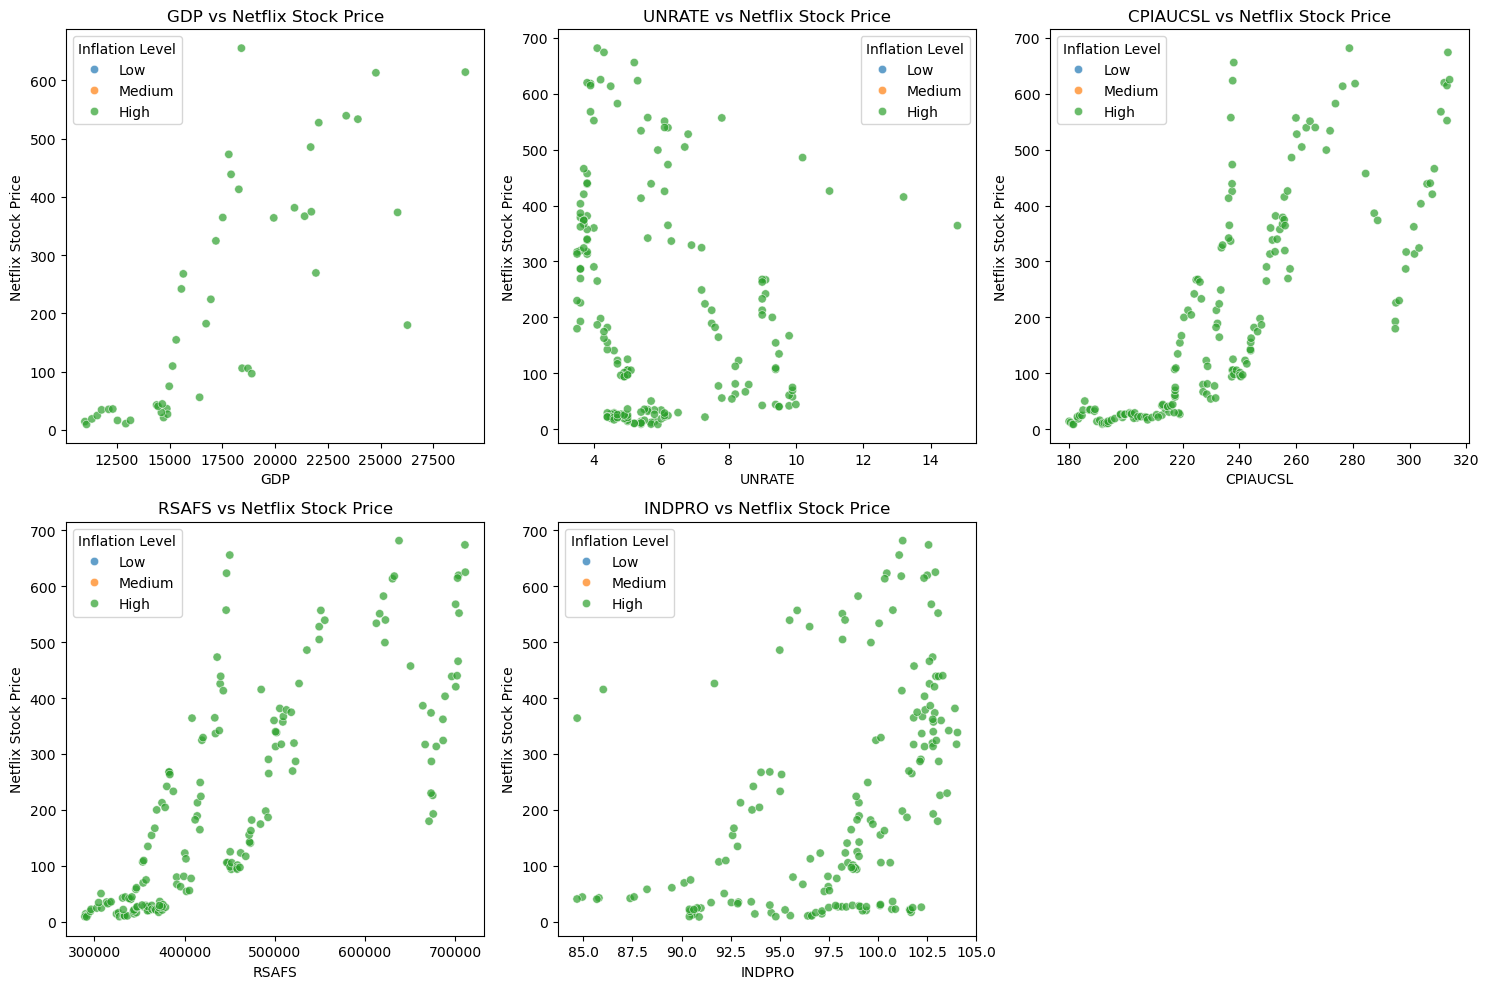

In [9]:
# Visualization 1: Scatter plots for each numerical macroeconomic factor
macroeconomic_factors = ['GDP', 'UNRATE', 'CPIAUCSL', 'RSAFS', 'INDPRO']

# Scatter plots for each macroeconomic factor compared to Netflix stock closing price 
plt.figure(figsize=(15, 10))

for i, factor in enumerate(macroeconomic_factors, start=1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=macro_and_stock_df, x=factor, y='close', hue='Inflation_Level', alpha=0.7)
    plt.title(f'{factor} vs Netflix Stock Price')
    plt.xlabel(factor)
    plt.ylabel('Netflix Stock Price')
    plt.legend(title='Inflation Level')

plt.tight_layout()
plt.show()

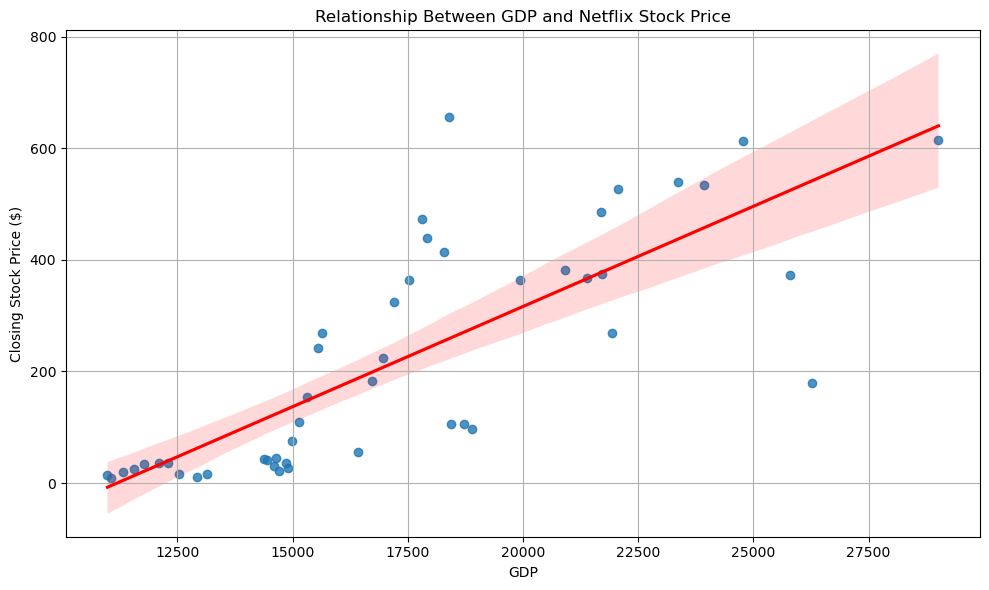

In [10]:
# Visualization 2: Scatter plot w/ line of best fit of GDP vs Netflix stock price

plt.figure(figsize=(10, 6))
sns.regplot(x='GDP', y='close', data=macro_and_stock_df, line_kws={'color':'red'})

plt.title('Relationship Between GDP and Netflix Stock Price')
plt.xlabel('GDP')
plt.ylabel('Closing Stock Price ($)')
plt.grid()
plt.tight_layout()
plt.show()

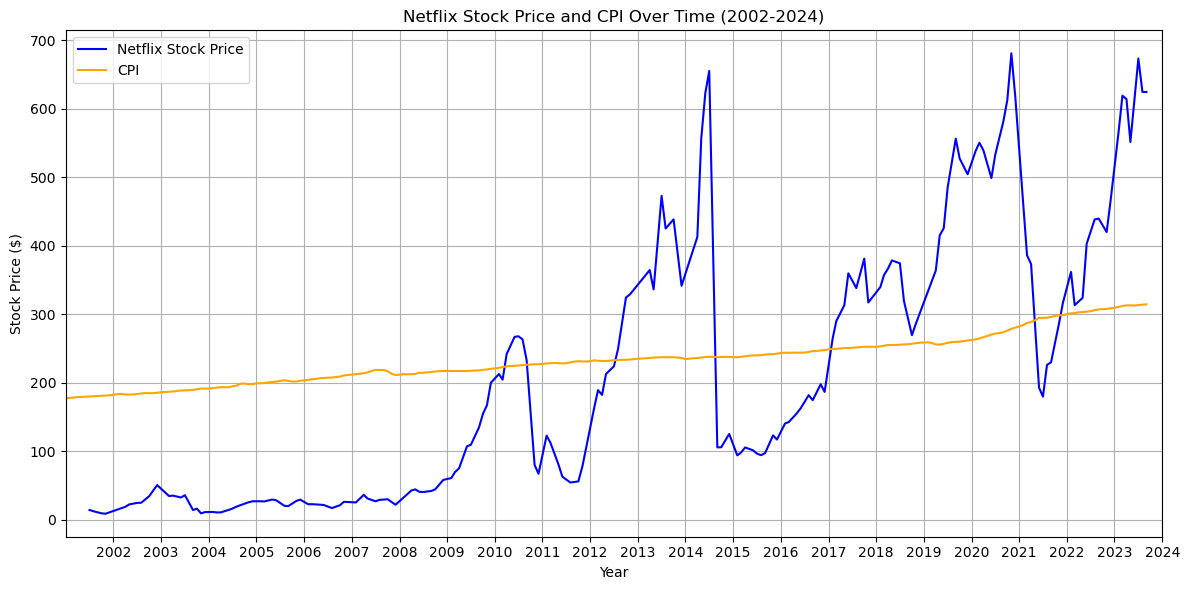

In [11]:
# Visualization 3: CPI vs Netflix stock price over time layered line graph

macro_and_stock_df['date'] = pd.to_datetime(macro_and_stock_df['date'])
macro_and_stock_df.set_index('date', inplace=True)

macro_and_stock_df['close'] = macro_and_stock_df['close'].interpolate(method='time')

plt.figure(figsize=(12, 6))
plt.plot(macro_and_stock_df['close']['2002':'2024'], label='Netflix Stock Price', color='blue')

# Set x-axis limits to focus on the years 2002-2024
plt.xlim(pd.Timestamp('2002-01-01'), pd.Timestamp('2024-12-31'))

# Setting x-ticks to show only the years
plt.xticks(ticks=pd.date_range(start='2002-01-01', end='2024-12-31', freq='YE'), labels=range(2002, 2025))

plt.plot(macro_and_stock_df['CPIAUCSL']['2002':'2024'], label='CPI', color='orange')

plt.title('Netflix Stock Price and CPI Over Time (2002-2024)')
plt.xlabel('Year')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/_p/t78nrsy97z1__v34mq7txr0c0000gn/T/ipykernel_68014/1741317123.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  economic_cycle_data = macro_and_stock_df.groupby('GDP_Growth_Stage')['close'].mean()


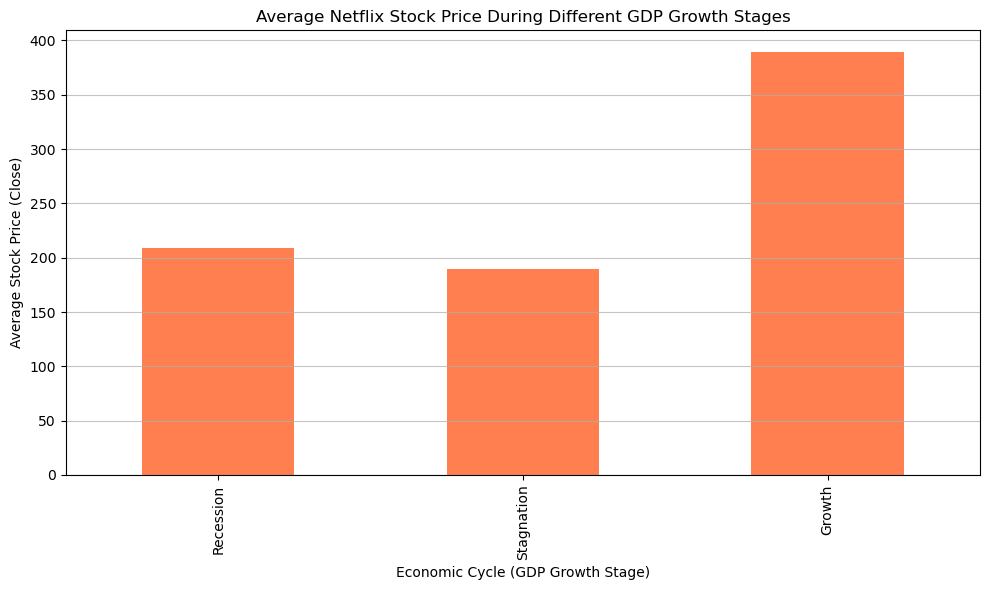

In [12]:
# Visualization 4: bar graph of average Netflix stock prices during different growth stages

economic_cycle_data = macro_and_stock_df.groupby('GDP_Growth_Stage')['close'].mean()

plt.figure(figsize=(10, 6))
economic_cycle_data.plot(kind='bar', color='coral')

plt.title('Average Netflix Stock Price During Different GDP Growth Stages')
plt.xlabel('Economic Cycle (GDP Growth Stage)')
plt.ylabel('Average Stock Price (Close)')

plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()